In [97]:
import pandas as pd
import matplotlib as plt
import statsmodels.api as sa
import numpy as np

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [98]:
dataframe = pd.read_csv("AirPassengers.csv")
dataframe

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [99]:
dataframe.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


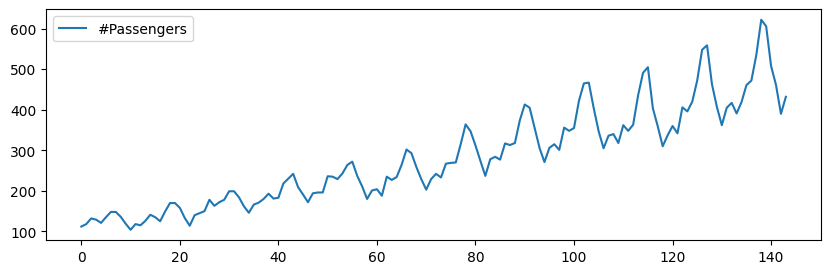

In [100]:
plt.rcParams["figure.figsize"] = [10, 3]
dataframe.plot()
pyplot.show()

In [101]:
df = pd.DataFrame(dataframe)
df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month", axis=1, inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


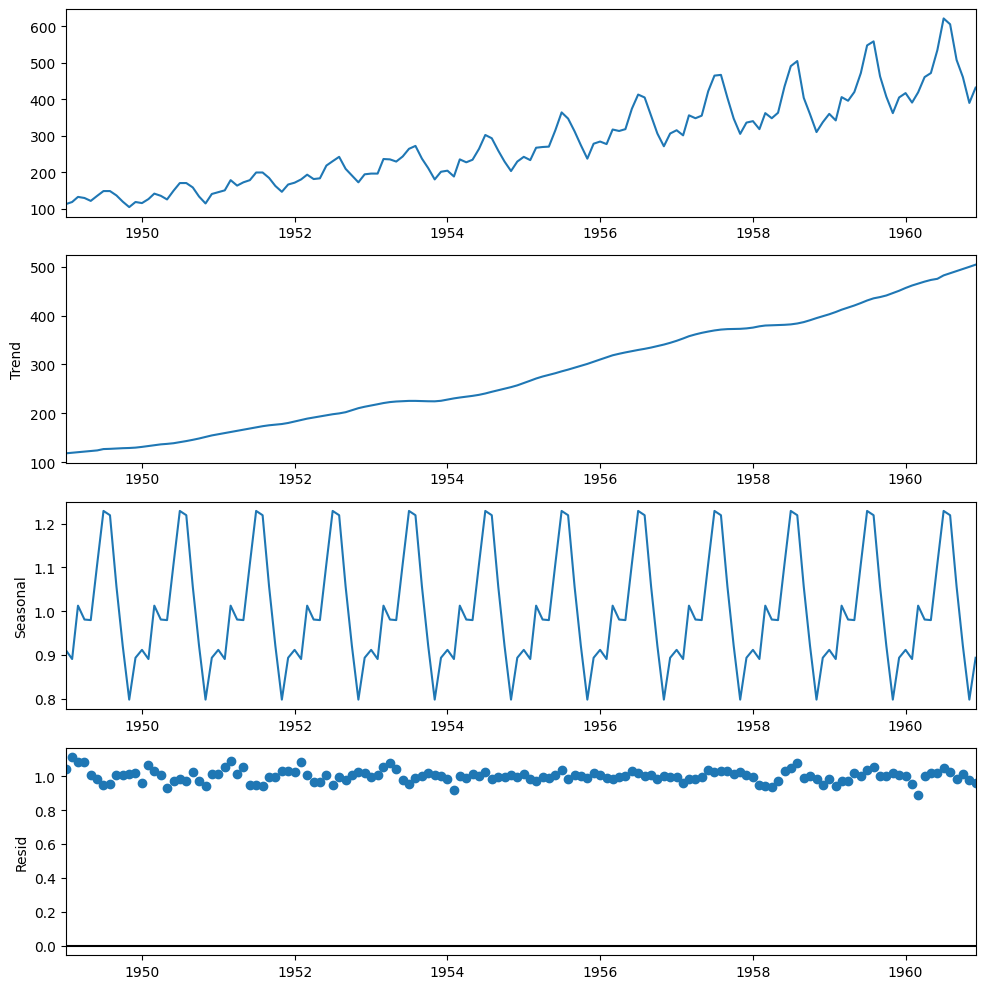

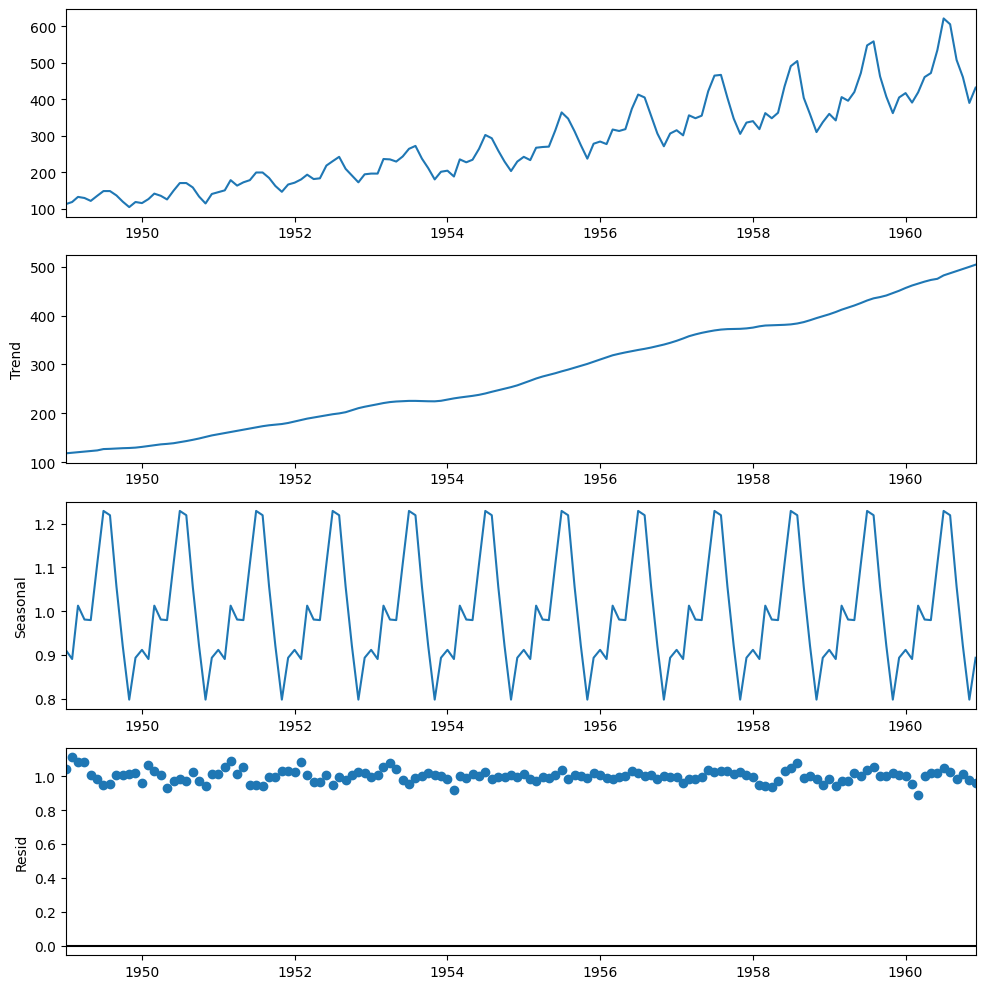

In [102]:
result_decompose = seasonal_decompose(df, model="multiplicative", extrapolate_trend=12)
plt.rcParams.update({"figure.figsize": (10,10)})
result_decompose.plot()

In [103]:
acf_value = acf(df)
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

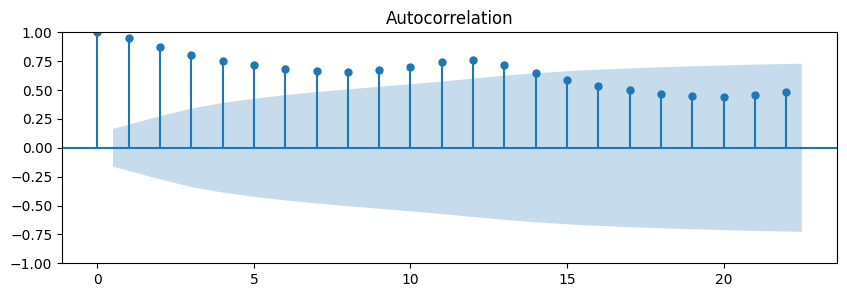

In [104]:
plt.rcParams["figure.figsize"]=[10,3]
plot_acf(df)
pyplot.show()

In [105]:
pacf_value = pacf(df, nlags=3)
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


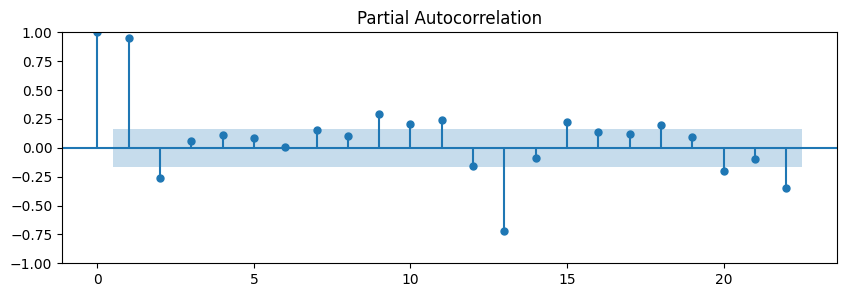

In [106]:
plt.rcParams["figure.figsize"]=[10,3]
plot_pacf(df)
pyplot.show()

In [107]:
src_data_model = df[:116]
model = sa.tsa.ARIMA(src_data_model).fit()

C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  116
Model:                          ARIMA   Log Likelihood                -691.389
Date:                Sun, 26 Mar 2023   AIC                           1386.777
Time:                        05:23:21   BIC                           1392.284
Sample:                    01-01-1949   HQIC                          1389.013
                         - 08-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        242.2327     10.046     24.113      0.000     222.543     261.922
sigma2      8805.0890   1406.888      6.259      0.000    6047.640    1.16e+04
===================================================================================
Ljung-Box (L1) (Q):                 100.16   Jarque-Bera (JB):                 8.80
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.63   Skew:                             0.67
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
pred = model.predict(116, 143, typ="levels")
pred

1958-09-01    242.232722
1958-10-01    242.232722
1958-11-01    242.232722
1958-12-01    242.232722
1959-01-01    242.232722
1959-02-01    242.232722
1959-03-01    242.232722
1959-04-01    242.232722
1959-05-01    242.232722
1959-06-01    242.232722
1959-07-01    242.232722
1959-08-01    242.232722
1959-09-01    242.232722
1959-10-01    242.232722
1959-11-01    242.232722
1959-12-01    242.232722
1960-01-01    242.232722
1960-02-01    242.232722
1960-03-01    242.232722
1960-04-01    242.232722
1960-05-01    242.232722
1960-06-01    242.232722
1960-07-01    242.232722
1960-08-01    242.232722
1960-09-01    242.232722
1960-10-01    242.232722
1960-11-01    242.232722
1960-12-01    242.232722
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot: xlabel='Month'>

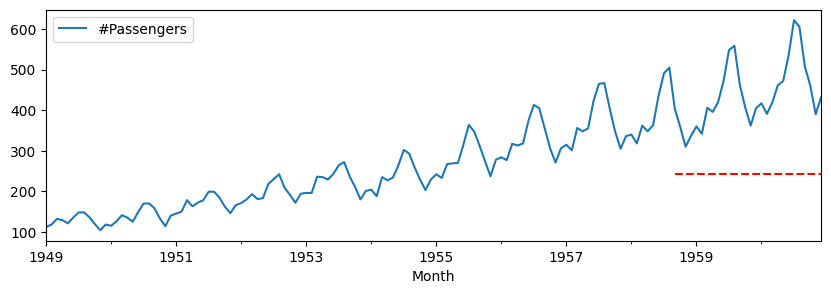

In [110]:
df.plot()
pred.plot(style="r--")

In [111]:
comp = df[116:]

In [112]:
comp

,#Passengers
Month,
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


In [113]:
def metrics(real, forecast):
    
    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values
    
    forecast=np.array(forecast)
    print("MAD:", round(abs(real-forecast).mean(),4))
    print("MSE", round(((real-forecast)**2).mean(),4))
    print("MAPE:", round((abs(real-forecast)/real).mean(),4))
    print("MPE:", round(((real-forecast)/real).mean(),4))
    print("Standard error:", round(((real-forecast)**2).mean()**0.5,4)) 

In [114]:
metrics(comp, pred)

MAD: 195.7673
MSE 44492.5412
MAPE: 0.4301
MPE: 0.4301
Standard error: 210.9326


In [115]:
model_2 = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()

C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
pred_2 = model_2.predict(116,143, typ="levels")
pred_2

1958-09-01    437.372756
1958-10-01    376.850389
1958-11-01    330.646459
1958-12-01    365.081754
1959-01-01    370.730637
1959-02-01    345.381859
1959-03-01    395.495891
1959-04-01    383.922645
1959-05-01    398.383428
1959-06-01    476.977712
1959-07-01    536.749295
1959-08-01    544.469669
1959-09-01    471.523025
1959-10-01    405.970595
1959-11-01    356.329917
1959-12-01    393.986388
1960-01-01    400.770151
1960-02-01    371.912878
1960-03-01    426.498260
1960-04-01    415.612593
1960-05-01    431.371988
1960-06-01    519.396703
1960-07-01    584.347728
1960-08-01    591.054270
1960-09-01    511.432093
1960-10-01    439.276103
1960-11-01    385.891120
1960-12-01    426.003629
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot: xlabel='Month'>

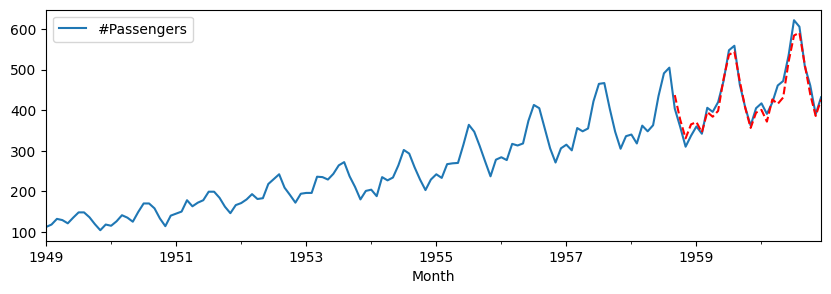

In [117]:
df.plot()
pred_2.plot(style="r--")

In [118]:
metrics(comp, pred_2)

MAD: 15.9839
MSE 389.3791
MAPE: 0.0369
MPE: 0.0101
Standard error: 19.7327


In [119]:
result = pd.DataFrame()
result["Lesson_47"] = ["Lecture_code_temperature", "dz_code_AirPassangers"]
result["ARIMA"] = [4.1204, 210.9326]
result["SARIMAX"] = [4.1375, 19.7327]
result

,Lesson_47,ARIMA,SARIMAX
0,Lecture_code_temperature,4.1204,4.1375
1,dz_code_AirPassangers,210.9326,19.7327


**As we can see from result, the data origins for analysis is crucial when we choose the model. The temperature varries not as much as passengers for an air company. While temperature has its bottom limit and upper limit, passengers just increase in numbers.**

**The ARIMA model doesn't take into account Trend, Seasonality or Exogenous Regressors, so it hit temperature forecast just in the middle between bottom and upper limits and got something that falls in beliavable and possible data (like snow in May). On the airpasangers data it totally failed as we got prediction out of possible boundaries (most airports closed down and number of flights reduced...COVID breakout could show us such results, but this situation totally not forecasted by our model).**

**The SARIMAX model did everything good both on temperature and passengers quantity by counting in all those factors which ARIMA model excluded.**